## Boston Neural Nets

### Reading and Understanding the data

In [1]:
library(MASS)

In [2]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [3]:
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


### Checking for missing values

In [4]:
any(is.na(Boston))

[1] FALSE

In [5]:
data <- Boston

### Feature Scaling

In [6]:
maxs <- apply(data,2,max)
maxs

crim       zn    indus     chas      nox       rm      age      dis 
 88.9762 100.0000  27.7400   1.0000   0.8710   8.7800 100.0000  12.1265 
     rad      tax  ptratio    black    lstat     medv 
 24.0000 711.0000  22.0000 396.9000  37.9700  50.0000

In [7]:
mins <- apply(data,2,min)
mins

crim        zn     indus      chas       nox        rm       age       dis 
  0.00632   0.00000   0.46000   0.00000   0.38500   3.56100   2.90000   1.12960 
      rad       tax   ptratio     black     lstat      medv 
  1.00000 187.00000  12.60000   0.32000   1.73000   5.00000

In [8]:
scaled.data <- scale(data, center=mins, scale = maxs-mins)
scaled <- as.data.frame(scaled.data)
head(scaled)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0000000000,0.18,0.06781525,0,0.3148148,0.5775053,0.6416066,0.2692031,0.00000000,0.20801527,0.2872340,1.0000000,0.08967991,0.4222222
2,0.0002359225,0.00,0.24230205,0,0.1728395,0.5479977,0.7826982,0.3489620,0.04347826,0.10496183,0.5531915,1.0000000,0.20447020,0.3688889
3,0.0002356977,0.00,0.24230205,0,0.1728395,0.6943859,0.5993821,0.3489620,0.04347826,0.10496183,0.5531915,0.9897373,0.06346578,0.6600000
4,0.0002927957,0.00,0.06304985,0,0.1502058,0.6585553,0.4418126,0.4485446,0.08695652,0.06679389,0.6489362,0.9942761,0.03338852,0.6311111
5,0.0007050701,0.00,0.06304985,0,0.1502058,0.6871048,0.5283213,0.4485446,0.08695652,0.06679389,0.6489362,1.0000000,0.09933775,0.6933333
6,0.0002644715,0.00,0.06304985,0,0.1502058,0.5497222,0.5746653,0.4485446,0.08695652,0.06679389,0.6489362,0.9929901,0.09602649,0.5266667


### Splitting the data

In [9]:
library(caTools)
sample <- sample.split(scaled$medv, SplitRatio=0.7)
train <- subset(scaled, sample==T)
test <- subset(scaled, sample==F)

### Building the model

In [10]:
library(neuralnet)

In [11]:
n <- names(train)
f <- as.formula(paste("medv ~", paste(n[!n %in% "medv"], collapse = " + ")))

In [12]:
nn <- neuralnet(f, data=train, hidden=c(5,3), linear.output=T)

In [13]:
plot(nn)

In [14]:
predicted.nn.values <- compute(nn, test[1:13])
str(predicted.nn.values)

List of 2
 $ neurons   :List of 3
  ..$ : num [1:139, 1:14] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:139] "1" "2" "5" "8" ...
  .. .. ..$ : chr [1:14] "" "crim" "zn" "indus" ...
  ..$ : num [1:139, 1:6] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:139] "1" "2" "5" "8" ...
  .. .. ..$ : NULL
  ..$ : num [1:139, 1:4] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:139] "1" "2" "5" "8" ...
  .. .. ..$ : NULL
 $ net.result: num [1:139, 1] 0.509 0.423 0.593 0.282 0.149 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:139] "1" "2" "5" "8" ...
  .. ..$ : NULL


In [15]:
true.predictions <- predicted.nn.values$net.result * (max(data$medv)-min(data$medv))+min(data$medv)

### Convert the test data

In [16]:
test.r <- (test$medv)*(max(data$medv)-min(data$medv))+min(data$medv)
MSE.nn <- sum((test.r - true.predictions)^2)/nrow(test)
MSE.nn

[1] 16.4963

In [17]:
error.df <- data.frame(test.r, true.predictions)
head(error.df)

,test.r,true.predictions
,<dbl>,<dbl>
1,24.0,27.90671
2,21.6,24.03780
5,36.2,31.67974
8,27.1,17.70436
9,16.5,11.72655
15,18.2,18.84161


In [18]:
library(ggplot2)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



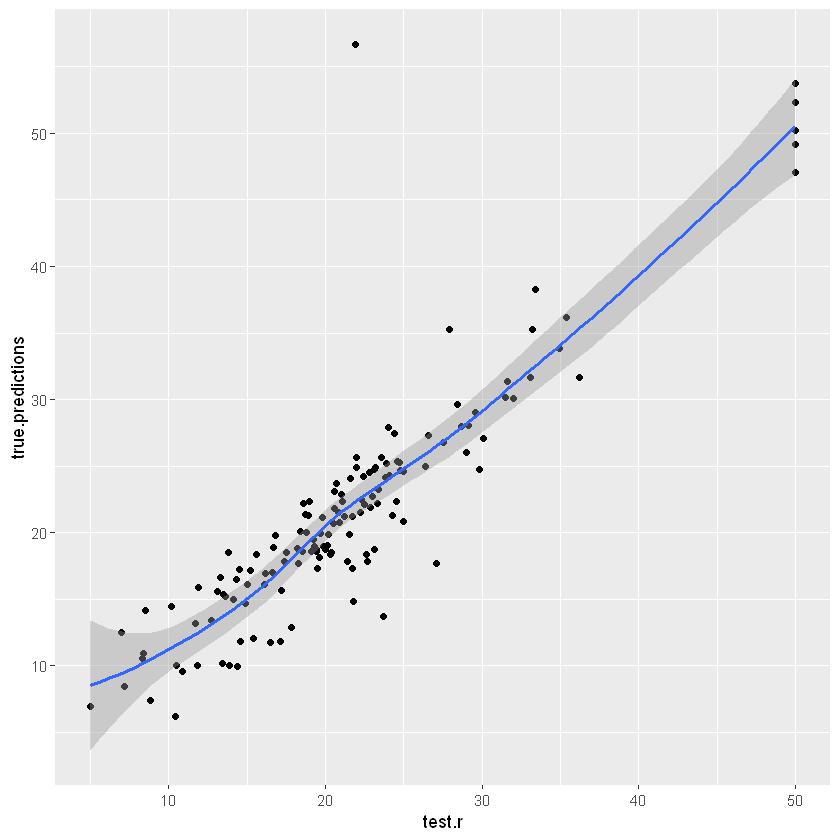

In [19]:
ggplot(error.df, aes(test.r, true.predictions)) + geom_point() + stat_smooth()

## END!!!